This notebook is meant to explore how sea ice variability influences atmospheric variability.

Compare the relaxation simulations to their unconstrained counterparts.


In [2]:
import cccmautils as cutl
import constants as con
import pandas as pd
import numpy.ma as ma


import loadCanESM2rlxdata as lrlx

%matplotlib inline


piyears='2015-3010' #'2911-3010' # '2015-3010'
#pislice=slice(-199,None); prstr='pi200yr'
pislice=slice(0,None); prstr='pi1kyr'

sea='DJF' 
zconv = 1/con.get_g()
sigtype='cont'

# use these dicts to translate b/w diff model output
fieldnames = {'sat':'st', 'slp':'pmsl',
             'z500': 'gz50000','sic':'sicn',
              'lhflx':'hfl','shflx':'hfs',}
fieldnamesun = {'sat':'tas','slp':'psl',
                'sic':'sic','z500': 'zg50000.00',
               'lhflx':'hfls','shflx':'hfss'}

# regions
regions = ('polcap70','chuckkug','less','soo','bksmori')

# use these dicts when reading in data initially
convs = {'st':1, 'pmsl':1,'gz50000':zconv,'sicn':100,
         'tas':1,'psl':1/100., 'sic':1, 'zg50000.00':1,
        'hfl':1,'hfs':1,'hfls':1,'hfss':1}
ncvars = {'st':'ST','pmsl':'PMSL','gz50000':'PHI','sicn':'SICN',
         'tas':'tas','psl':'psl', 'sic':'sic', 'zg50000.00':'zg',
         'hfl':'HFL','hfs':'HFS','hfls':'hfls','hfss':'hfss'}


casenames = ('preipreiice', 'prei2xco2iceb','2xco22xco2ice','2xco2preiice',
            'piControl','gregory_2xco2')

DataRoot = '/Users/kelly/DATA/DataDisk/'
#years = {'piControl':'2911-3010', 'gregory_2xco2':'2451-2550'}#'2015-3010'
years = {'preipreiice': '2922-3121',
             'prei2xco2iceb': '3022-3221',
             '2xco22xco2ice': '2452-2651',
             '2xco2preiice': '2552-2751',
        'gregory_2xco2':'2451-2550','piControl':piyears}

# get all time elements for all cases except piControl
slices = {'preipreiice':slice(None),
         'prei2xco2iceb': slice(None),
             '2xco22xco2ice': slice(None),
             '2xco2preiice': slice(None),
        'gregory_2xco2':slice(None),
          'piControl':pislice}

nrows: 3 ncols: 14


/Users/kelly/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/kelly/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/kelly/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


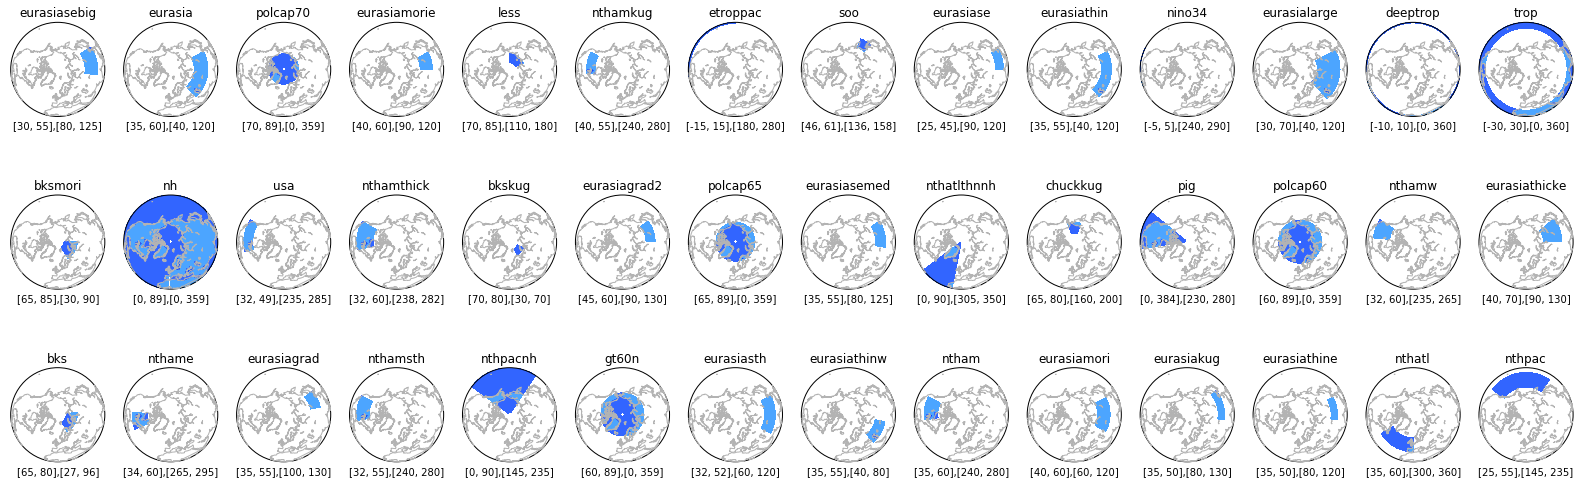

In [3]:
cplt.plot_allregions()

In [4]:

# Load the seasonal avg data

allseadt={}; allseastddt={}

# load nudging runs
for cs in casenames[:4]:
    seaflddt={}; seastddt={}
    for fieldname in fieldnames.keys():
        
        field=fieldnames[fieldname]
        print cs,field,fieldname
        
        filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_'+sea+'.nc'
        print filename
        seaflddt[fieldname] = cnc.getNCvar(filename,ncvars[field])[slices[cs]]*convs[field]
        seastddt[fieldname]=seaflddt[fieldname].std(axis=0)
    
    seaflddt['turb'] = seaflddt['lhflx']+seaflddt['shflx']
    seastddt['turb'] = seaflddt['turb'].std(axis=0)
    allseadt[cs] = seaflddt
    allseastddt[cs] = seastddt
        
lat=cnc.getNCvar(filename,'lat')
lon=cnc.getNCvar(filename,'lon')
    
# load unconstrained runs    
for cs in ('piControl','gregory_2xco2'):
    
    seaflddt={}; seastddt={}
    for fieldname in fieldnamesun.keys():
        
        field=fieldnamesun[fieldname]
        
        print cs,field,fieldname
        if fieldname in ('z500','sic') and cs in ('gregory_2xco2',):
            pass
        else:
            filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_'+sea+'.nc'
            print filename
            seaflddt[fieldname] = cnc.getNCvar(filename,ncvars[field])[slices[cs]]*convs[field]
            if fieldname in ('sat',) and cs in ('piControl','gregory_2xco2'): 
                seaflddt[fieldname] = seaflddt[fieldname] - 273
            seastddt[fieldname]=seaflddt[fieldname].std(axis=0)
        
    seaflddt['turb'] = seaflddt['lhflx']+seaflddt['shflx']
    seastddt['turb'] = seaflddt['turb'].std(axis=0)
    allseadt[cs] = seaflddt
    allseastddt[cs] = seastddt
    
    
        
unlat=cnc.getNCvar(filename,'lat')
unlon=cnc.getNCvar(filename,'lon')

print allseadt['piControl']['sat'].shape,allseadt['preipreiice']['sat'].shape
print allseadt['gregory_2xco2']['sat'].shape,allseadt['2xco22xco2ice']['sat'].shape


preipreiice hfl lhflx
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_hfl_2922-3121_DJF.nc
preipreiice hfs shflx
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_hfs_2922-3121_DJF.nc
preipreiice pmsl slp
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_pmsl_2922-3121_DJF.nc
preipreiice sicn sic
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_sicn_2922-3121_DJF.nc
preipreiice gz50000 z500
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_gz50000_2922-3121_DJF.nc
preipreiice st sat
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_st_2922-3121_DJF.nc
prei2xco2iceb hfl lhflx
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_hfl_3022-3221_DJF.nc
prei2xco2iceb hfs shflx
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_hfs_3022-3221_DJF.nc
prei2xco2iceb pmsl slp
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_pmsl_3022-3221_DJF.nc
prei2xco2iceb sicn sic
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_sicn_3022-3221_DJF.nc
prei2xco2iceb gz50000 z500
/Users

In [5]:
# compute t and f statistics / pvals
cutl = reload(cutl)

pseatstatdt={}; dseatstatdt={}
pseafstatdt={}; dseafstatdt={}

allfields=tuple(fieldnames.keys())+('turb',)
for field in allfields:
    
    print field
    pseatstatdt[field] = cutl.ttest_ind(allseadt['piControl'][field],
                                        allseadt['preipreiice'][field][...,:-1],axis=0)

    pseafstatdt[field] = cutl.calc_fstat(allseadt['piControl'][field],
                                    allseadt['preipreiice'][field][...,:-1])
    if field not in ('z500','sic'):
        dseatstatdt[field] = cutl.ttest_ind(allseadt['gregory_2xco2'][field],
                                    allseadt['2xco22xco2ice'][field][...,:-1],axis=0)
        
        dseafstatdt[field] = cutl.calc_fstat(allseadt['gregory_2xco2'][field],
                                        allseadt['2xco22xco2ice'][field][...,:-1])

lhflx
shflx
slp
sic


/Users/kelly/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kelly/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kelly/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/kelly/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1972: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


z500
sat
turb


In [6]:
# Now compute b/w mean states of nudged and unconstrained

nseatstatdt={}; useatstatdt={}
nseafstatdt={}; useafstatdt={}

allfields=tuple(fieldnames.keys())+('turb',)

for field in allfields:
    print field
    nseatstatdt[field] = cutl.ttest_ind(allseadt['2xco22xco2ice'][field],
                                        allseadt['preipreiice'][field],axis=0)

    nseafstatdt[field] = cutl.calc_fstat(allseadt['2xco22xco2ice'][field],
                                    allseadt['preipreiice'][field])
    if field not in ('z500','sic'):
        useatstatdt[field] = cutl.ttest_ind(allseadt['gregory_2xco2'][field],allseadt['piControl'][field],axis=0)
        
        useafstatdt[field] = cutl.calc_fstat(allseadt['gregory_2xco2'][field],allseadt['piControl'][field])
        

lhflx
shflx
slp
sic
z500
sat
turb


In [7]:
def plot_field(dt,ptstatdt,dtstatdt,pparams,pparamsd,skip2x=False):
    
    
    pltfld1 = dt['preipreiice'][field].mean(axis=0)
    pltfld2 = dt['piControl'][field].mean(axis=0)
    pv = ptstatdt[field][1]

    if skip2x:
        fig,axs=plt.subplots(1,3,figsize=(10,4))
        ax=axs[0]
    else:
        fig,axs=plt.subplots(2,3,figsize=(10,7))
        ax=axs[0,0]
    cplt.kemmap(pltfld1,lat,lon,axis=ax,**pparams)
    ax.set_ylabel('Preindustrial',fontsize=fsz-2)
    ax.set_title('nudged '+field.upper(),fontsize=fsz-2)
    if skip2x: ax=axs[1]
    else: ax=axs[0,1]
    cplt.kemmap(pltfld2,unlat,unlon,axis=ax,**pparams)
    ax.set_title('unconstrained '+field.upper(),fontsize=fsz-2)
    if skip2x: ax=axs[2]
    else: ax=axs[0,2]
    bm,pc = cplt.kemmap(pltfld1[:,:-1]-pltfld2,
                lat,lon[:-1],axis=ax,**pparamsd)
    cplt.addtsigm(bm,pv,lat,lon[:-1],sigtype=sigtype)
    ax.set_title('nudged - unconstr',fontsize=fsz-2)

    if not skip2x:
        pltfld1 = dt['2xco22xco2ice'][field].mean(axis=0)
        pltfld2 = dt['gregory_2xco2'][field].mean(axis=0)
        pv = dtstatdt[field][1]

        ax=axs[1,0]
        cplt.kemmap(pltfld1,lat,lon,axis=ax,**pparamsclim)
        ax.set_ylabel('Doubled CO$_2$',fontsize=fsz-2)
        ax=axs[1,1]
        cplt.kemmap(pltfld2,unlat,unlon,axis=ax,**pparamsclim)
        ax=axs[1,2]
        bm,pc = cplt.kemmap(pltfld1[:,:-1]-pltfld2,
                    lat,lon[:-1],axis=ax,**pparamsd)
        cplt.addtsigm(bm,pv,lat,lon[:-1],sigtype=sigtype)
    
    return fig

def plot_sigma(dt,pfstatdt,dfstatdt,pparams,pparamsd,skip2x=False):

    pltfld1 = dt['preipreiice'][field]
    pltfld2 = dt['piControl'][field]
    pv = pfstatdt[field][1]

    if skip2x:
        fig,axs=plt.subplots(1,3,figsize=(10,4))
        ax=axs[0]
    else:
        fig,axs=plt.subplots(2,3,figsize=(10,7))
        ax=axs[0,0]
        
    cplt.kemmap(pltfld1,lat,lon,axis=ax,**pparams)
    ax.set_ylabel('Preindustrial',fontsize=fsz-2)
    ax.set_title('nudged '+field.upper()+ ' $\sigma$',fontsize=fsz-2)
    if skip2x: ax=axs[1]
    else: ax=axs[0,1]
    cplt.kemmap(pltfld2,unlat,unlon,axis=ax,**pparams)
    ax.set_title('unconstrained '+field.upper()+ ' $\sigma$',fontsize=fsz-2)
    if skip2x: ax=axs[2]
    else: ax=axs[0,2]
    bm,pc = cplt.kemmap(pltfld1[:,:-1]/pltfld2,
                lat,lon[:-1],axis=ax,**pparamsd)
    cplt.addtsigm(bm,pv,lat,lon[:-1],sigtype=sigtype)
    ax.set_title('nudged / unconstr',fontsize=fsz-2)

    if not skip2x:
        pltfld1 = dt['2xco22xco2ice'][field]
        pltfld2 = dt['gregory_2xco2'][field]
        pv = dfstatdt[field][1]

        ax=axs[1,0]
        cplt.kemmap(pltfld1,lat,lon,axis=ax,**pparams)
        ax.set_ylabel('Doubled CO$_2$',fontsize=fsz-2)
        ax=axs[1,1]
        cplt.kemmap(pltfld2,unlat,unlon,axis=ax,**pparams)
        ax=axs[1,2]
        bm,pc = cplt.kemmap(pltfld1[:,:-1]/pltfld2,
                    lat,lon[:-1],axis=ax,**pparamsd)
        cplt.addtsigm(bm,pv,lat,lon[:-1],sigtype=sigtype)
    

    return fig


def plot_sigma_meanstate(dt,nfstatdt,ufstatdt,pparamsd):

    pltfld1 = dt['2xco22xco2ice'][field]
    pltfld2 = dt['preipreiice'][field]
    pv = nfstatdt[field][1]

    fig,axs=plt.subplots(1,2,figsize=(7,5))
    ax=axs[0]
    bm,pc = cplt.kemmap(pltfld1/pltfld2,lat,lon,axis=ax,**pparamsd)
    ax.set_ylabel('2X / PI',fontsize=fsz-2)
    ax.set_title('nudged '+field.upper()+ ' $\sigma$ ratio',fontsize=fsz-2)
    cplt.addtsigm(bm,pv,lat,lon,sigtype=sigtype)    
    
    pltfld1 = dt['gregory_2xco2'][field]
    pltfld2 = dt['piControl'][field]
    pv = ufstatdt[field][1]
    
    ax=axs[1]
    bm, pc = cplt.kemmap(pltfld1/pltfld2,unlat,unlon,axis=ax,**pparamsd)
    ax.set_title('unconstrained '+field.upper()+ ' $\sigma$ ratio',fontsize=fsz-2)
    cplt.addtsigm(bm,pv,unlat,unlon,sigtype=sigtype)    

    return fig

### Seasonal Figures


DJF


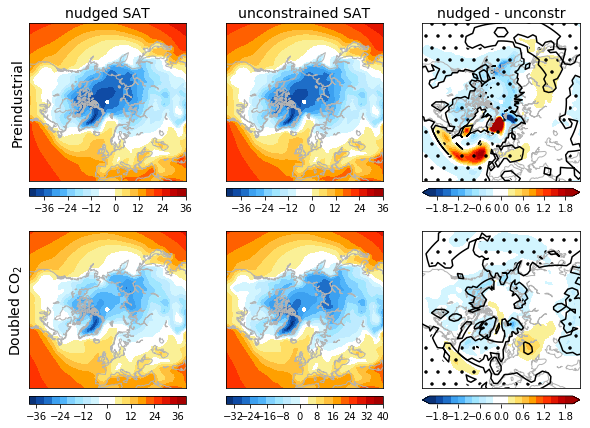

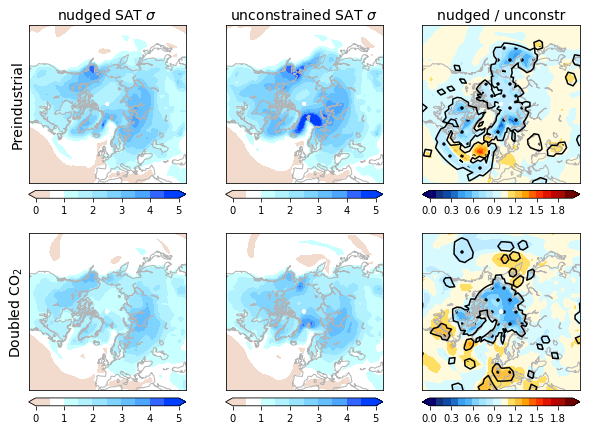

In [10]:
print sea

printtofile=False


# show unconstrained / nudged to answer: How does sea ice variabilty affect climate variability?

fsz=16
ptype='nh'
cmin=0; cmax=5
cmap='blue2blue_bw10'
cmap2='blue2red_20'

latlim=35
round=False

pparamsclim={'ptype':ptype,'latlim':latlim,'round':round} # for the climo diffs
pparamsdiff={'cmin':-2, 'cmax':2, 'cmap':'blue2red_w20','ptype':ptype,
             'latlim':latlim,'round':round} # for the climo diff diffs
pparams={'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'ptype':ptype,
         'latlim':latlim,'round':round} # for the sigma
pparamssigrat={'cmin':0, 'cmax':2, 'cmap':cmap2,'ptype':ptype,
               'latlim':latlim,'round':round} # for the sig ratios



# SAT
field='sat'
sigtype='conthatch'


fig = plot_field(allseadt,pseatstatdt,dseatstatdt,pparamsclim,pparamsdiff)
if printtofile:
    fig.savefig(field.upper()+'_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')
# ==============

fig = plot_sigma(allseastddt,pseafstatdt,dseafstatdt,pparams,pparamssigrat)
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')    

 

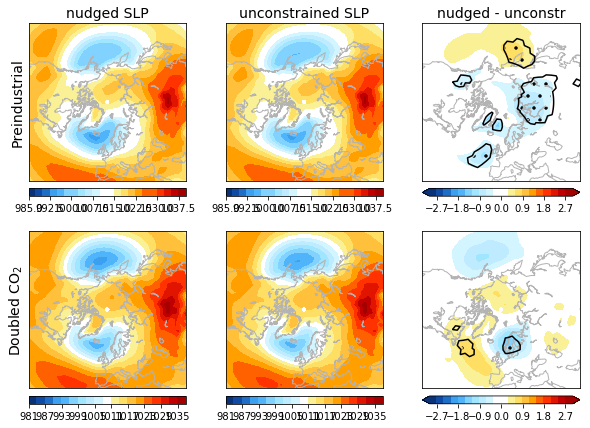

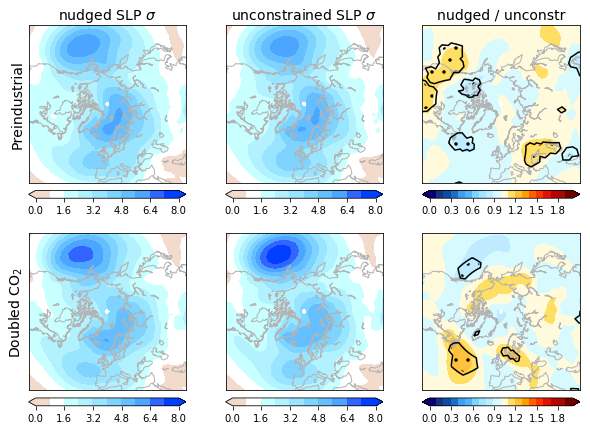

In [11]:
# SLP
printtofile=False

ptype='nh'
cmin=0; cmax=8
cmap='blue2blue_bw10'
cmap2='blue2red_20'

field='slp'

pparamsclim={'ptype':ptype,'latlim':latlim,'round':round} # for the climo diffs
pparamsdiff={'cmin':-3, 'cmax':3, 'cmap':'blue2red_w20','ptype':ptype,
             'latlim':latlim,'round':round} # for the climo diff diffs
pparams={'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'ptype':ptype,
         'latlim':latlim,'round':round} # for the sigma
pparamssigrat={'cmin':0, 'cmax':2, 'cmap':cmap2,'ptype':ptype,
               'latlim':latlim,'round':round} # for the sig ratios


fig = plot_field(allseadt,pseatstatdt,dseatstatdt,pparamsclim,pparamsdiff)
if printtofile:
    fig.savefig(field.upper()+'_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')
# ==============

fig = plot_sigma(allseastddt,pseafstatdt,dseafstatdt,pparams,pparamssigrat)
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')    
    

DJF


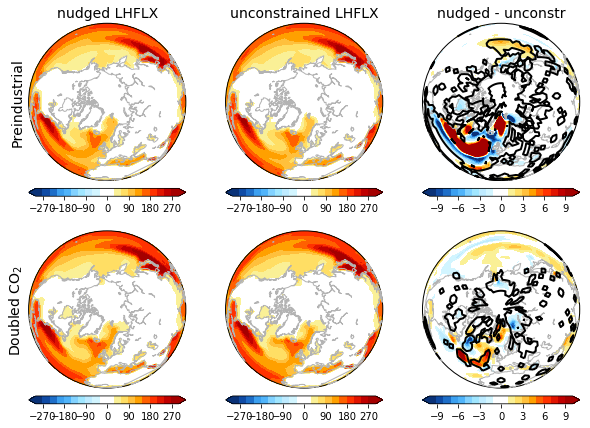

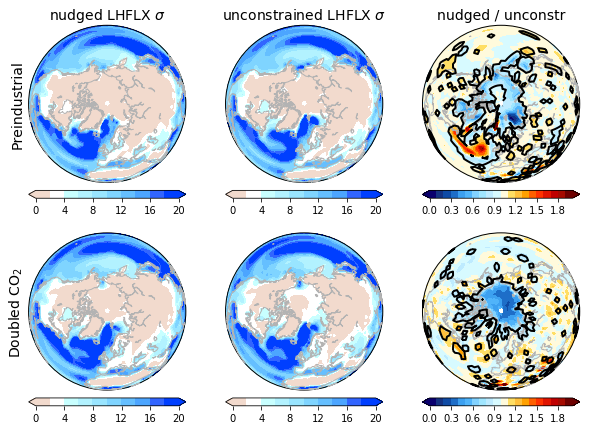

In [182]:
# LHFLX

printtofile=True

print sea

ptype='nh'
cmin=0; cmax=20
cmap='blue2blue_bw10'
cmap2='blue2red_20'

pparams3={'cmin':cmin, 'cmax':cmax, 'cmap':cmap,'ptype':ptype}
pparams3diff={'cmin':0,'cmax':2,'cmap':cmap2,'ptype':ptype}
pparamsclim={'ptype':ptype,'cmin':-300,'cmax':300} 
pparamsdiff={'cmin':-10,'cmax':10,'cmap':'blue2red_w20','ptype':ptype}

field='lhflx'

fig = plot_field(allseadt,pseatstatdt,dseatstatdt,pparamsclim,pparamsdiff)
if printtofile:
    fig.savefig(field.upper()+'_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')
# ==============

fig = plot_sigma(allseastddt,pseafstatdt,dseafstatdt,pparams3,pparams3diff)
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')    

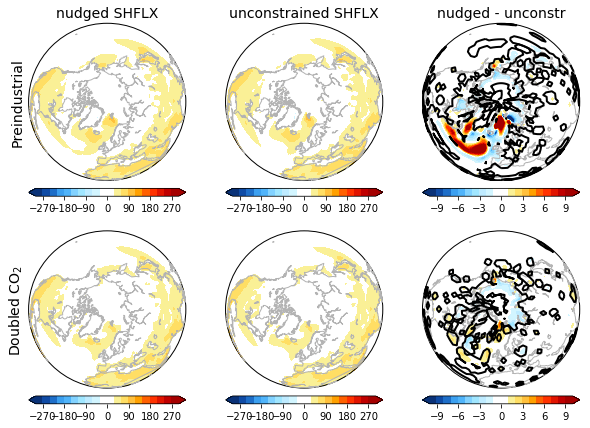

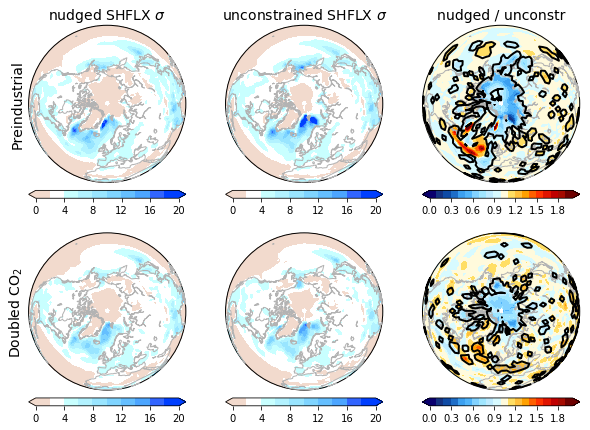

In [118]:
# SHFLX

printtofile=True

field='shflx'

fig = plot_field(allseadt,pseatstatdt,dseatstatdt,pparamsclim,pparamsdiff)
if printtofile:
    fig.savefig(field.upper()+'_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')
# ==============

fig = plot_sigma(allseastddt,pseafstatdt,dseafstatdt,pparams3,pparams3diff)
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')    



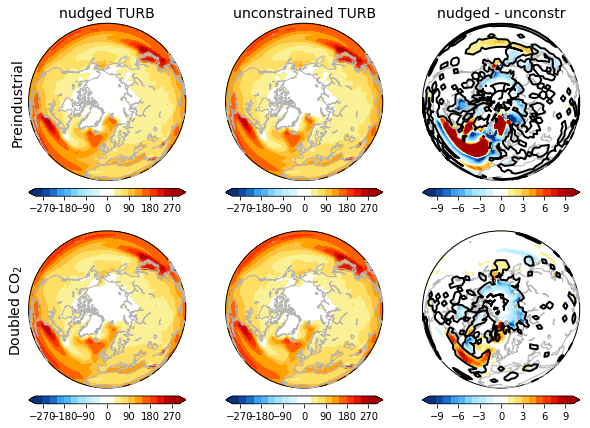

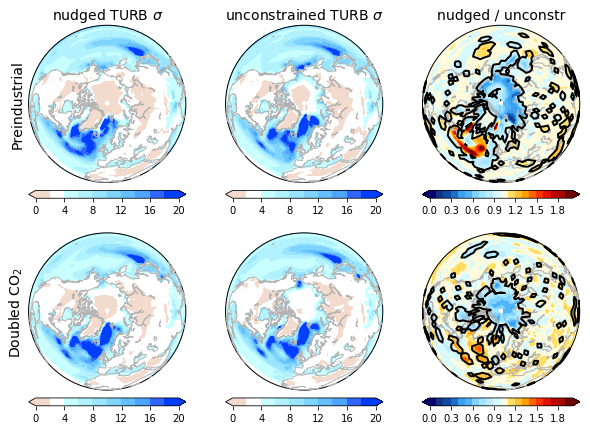

In [119]:
# TURB

printtofile=True

field='turb'

fig = plot_field(allseadt,pseatstatdt,dseatstatdt,pparamsclim,pparamsdiff)
if printtofile:
    fig.savefig(field.upper()+'_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')
# ==============

fig = plot_sigma(allseastddt,pseafstatdt,dseafstatdt,pparams3,pparams3diff)
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_'+sea+'.pdf',bbox_inches='tight')    



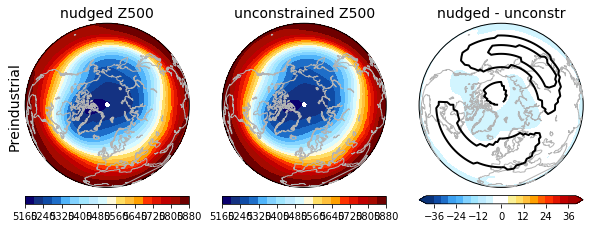

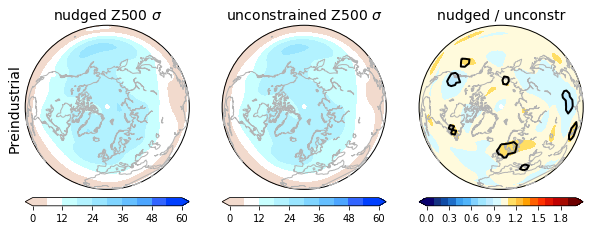

In [120]:
# Z500. PI only
printtofile=True

field='z500'

cmap='blue2blue_bw10'
cmap2='blue2red_20'

pparamsclim={'ptype':ptype,'cmap':cmap2,}#,'cmin':-300,'cmax':300} 
pparamsclimdiff={'cmin':-40, 'cmax':40, 'ptype':ptype}
pparamssig={'ptype':ptype,'cmap':cmap,'cmin':0,'cmax':60}
pparamssigrat={'ptype':ptype,'cmap':cmap2,'cmin':0,'cmax':2}


fig = plot_field(allseadt,pseatstatdt,dseatstatdt,pparamsclim,pparamsclimdiff,skip2x=True)
if printtofile:
    fig.savefig(field.upper()+'_nudged_unconstr_PIonly_'+sea+'.pdf',bbox_inches='tight')
# ==============

fig = plot_sigma(allseastddt,pseafstatdt,dseafstatdt,pparamssig,pparamssigrat,skip2x=True)
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_PIonly_'+sea+'.pdf',bbox_inches='tight')    



/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: RuntimeWarning: divide by zero encountered in divide
/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: RuntimeWarning: invalid value encountered in divide


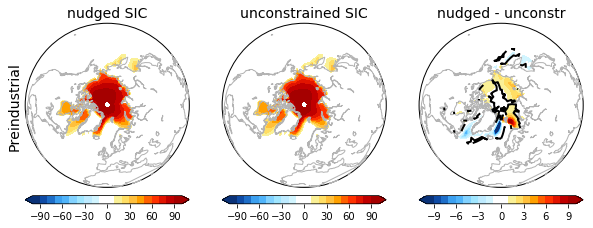

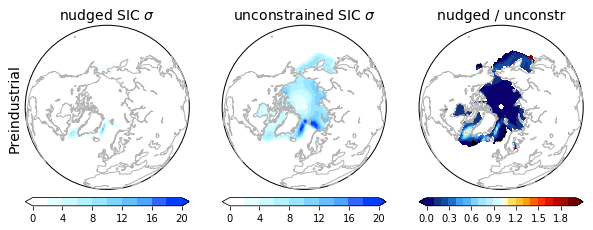

In [121]:
# SIC
#  PI only
printtofile=True

field='sic'

cmap='blue2blue_w10'
cmap2='blue2red_20'


pparamsclim={'ptype':ptype,'cmin':-100,'cmax':100} 
pparamsclimdiff={'cmin':-10, 'cmax':10, 'ptype':ptype}
pparamssig={'ptype':ptype,'cmap':cmap,'cmin':0,'cmax':20}
pparamssigrat={'ptype':ptype,'cmap':cmap2,'cmin':0,'cmax':2}


fig = plot_field(allseadt,pseatstatdt,dseatstatdt,pparamsclim,pparamsclimdiff,skip2x=True)
if printtofile:
    fig.savefig(field.upper()+'_nudged_unconstr_PIonly_'+sea+'.pdf',bbox_inches='tight')
# ==============

fig = plot_sigma(allseastddt,pseafstatdt,dseafstatdt,pparamssig,pparamssigrat,skip2x=True)
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_PIonly_'+sea+'.pdf',bbox_inches='tight')    



### REGRESSIONS

In [134]:
# calculate regressions w/ space
def corrmap(inr,insp,dims):
    """   
          inr is 1D [time or numens]
          insp is 2D [time or numens x space.flat]
          dims are a tuple of dims to reshape space to (nlat,nlon) 

          returns slopemap,corrmap,pvalmap [dims]           
    """ 
    #print inr.shape, insp.shape
    
    inspf = insp.reshape((insp.shape[0],dims[0]*dims[1]))
    print inspf.shape
    
    mm,bb,rval,pval = cutl.regress(inr,inspf)
    #slope,intercept = np.polyfit(inr,insp, 1)
    corrmap = rval.reshape(dims)
    pvmap = pval.reshape(dims)
    slopemap = mm.reshape(dims)
    
    return slopemap,corrmap,pvmap



In [199]:
# Regress SAT, SLP, Z500 on Arctic SAT in nudged and unconstrained runs

satregdt={}; # just SAT regional avg
sicregdt={}
for reg in regions:
    
    dt={}
    fld = allseadt['piControl']['sat']
    dt['piControl'] = cutl.calc_regmean(fld,unlat,unlon,region=reg)
    fld = allseadt['preipreiice']['sat']
    dt['preipreiice'] = cutl.calc_regmean(fld,lat,lon,region=reg)
    satregdt[reg] = dt
    
    dt={}
    fld = allseadt['piControl']['sic']
    dt['piControl'] = cutl.calc_regmean(fld,unlat,unlon,region=reg,alsomask='land')
    fld = allseadt['preipreiice']['sic']
    dt['preipreiice'] = cutl.calc_regmean(fld,lat,lon,region=reg,alsomask='land')
    sicregdt[reg] = dt
    

calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)
calc_regmean() removing extra lon. fld new shape: (199, 64, 128)


In [200]:
print regions

corrreg='bksmori' # 'soo' #'polcap70' #'chuckkug' #'polcap70'

# Correlate SAT with regional SAT

# unconstrained
fldsatr = satregdt[corrreg]['piControl']
fldsatsp = allseadt['piControl']['sat']
# nudged
nfldsatr = satregdt[corrreg]['preipreiice']
nfldsatsp = allseadt['preipreiice']['sat']

print fldsatr.shape,fldsatsp.shape

# ------ sat on sat
satslmap,satcrmap,satpvmap = corrmap(fldsatr,fldsatsp,fldsatsp.shape[1:])
satcrmapsig = ma.masked_where(satpvmap>0.05,satcrmap)

satnslmap,satncrmap,satnpvmap = corrmap(nfldsatr,nfldsatsp,nfldsatsp.shape[1:])
satncrmapsig = ma.masked_where(satnpvmap>0.05,satncrmap)

import corrstats as corrstats
satzsc,satzpv = corrstats.independent_corr(satcrmap,satncrmap[:,:-1],len(fldsatr),n2=len(nfldsatr))

print satzsc.shape

# Correlate SLP with regional SAT
# unconstrained
fldslpsp = allseadt['piControl']['slp']
# nudged
nfldslpsp = allseadt['preipreiice']['slp']

# ------- slp on sat
slponsatslmap,slponsatcrmap,slponsatpvmap = corrmap(fldsatr,fldslpsp,fldslpsp.shape[1:])
slponsatcrmapsig = ma.masked_where(slponsatpvmap>0.05,slponsatcrmap)

slponsatnslmap,slponsatncrmap,slponsatnpvmap = corrmap(nfldsatr,nfldslpsp,nfldslpsp.shape[1:])
slponsatncrmapsig = ma.masked_where(slponsatnpvmap>0.05,slponsatncrmap)

slponsatzsc,slponsatzpv = corrstats.independent_corr(slponsatcrmap,slponsatncrmap[:,:-1],len(fldsatr),n2=len(nfldsatr))


#  Now correlate SAT with regional SIC
fldsicr = sicregdt[corrreg]['piControl']
nfldsicr = sicregdt[corrreg]['preipreiice']

# ----- sat on sic
satonsicslmap,satonsiccrmap,satonsicpvmap = corrmap(fldsicr,fldsatsp,fldsatsp.shape[1:])
satonsiccrmapsig = ma.masked_where(satonsicpvmap>0.05,satonsiccrmap)

satonsicnslmap,satonsicncrmap,satonsicnpvmap = corrmap(nfldsicr,nfldsatsp,nfldsatsp.shape[1:])
satonsicncrmapsig = ma.masked_where(satonsicnpvmap>0.05,satonsicncrmap)

satonsiczsc,satonsiczpv = corrstats.independent_corr(satonsiccrmap,satonsicncrmap[:,:-1],len(fldsicr),n2=len(nfldsicr))

#  Now correlate SLP with regional SIC

# ----- slp on sic 
slponsicslmap,slponsiccrmap,slponsicpvmap = corrmap(fldsicr,fldslpsp,fldslpsp.shape[1:])
slponsiccrmapsig = ma.masked_where(slponsicpvmap>0.05,slponsiccrmap)

slponsicnslmap,slponsicncrmap,slponsicnpvmap = corrmap(nfldsicr,nfldslpsp,nfldslpsp.shape[1:])
slponsicncrmapsig = ma.masked_where(slponsicnpvmap>0.05,slponsicncrmap)

slponsiczsc,slponsiczpv = corrstats.independent_corr(slponsiccrmap,slponsicncrmap[:,:-1],len(fldsicr),n2=len(nfldsicr))


('polcap70', 'chuckkug', 'less', 'soo', 'bksmori')
(995,) (995, 64, 128)
(995, 8192)
(199, 8256)
(64, 128)
(995, 8192)
(199, 8256)
(995, 8192)
(199, 8256)
(995, 8192)
(199, 8256)


DJF
SAT correlated with bksmori SAT
SLP correlated with bksmori SAT
SAT correlated with minus bksmori SIC
SLP correlated with minus bksmori SIC


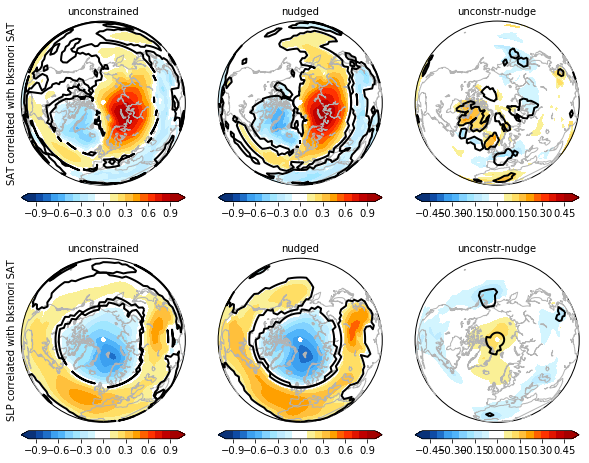

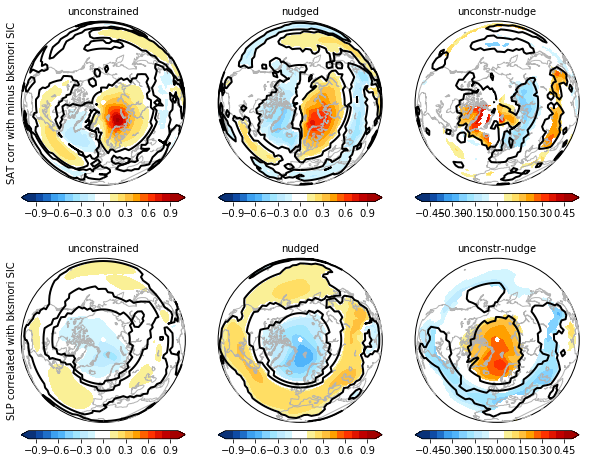

In [201]:
print sea
print 'SAT correlated with ' + corrreg + ' SAT'

fig,axs = plt.subplots(2,3,figsize=(10,8))
ax=axs[0,0]
bm,pc = cplt.kemmap(satcrmapsig,unlat,unlon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='unconstrained')
cplt.addtsigm(bm,satpvmap,unlat,unlon,sigtype=sigtype)
ax.set_ylabel('SAT correlated with ' + corrreg + ' SAT')
ax=axs[0,1]
bm,pc = cplt.kemmap(satncrmapsig,lat,lon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='nudged')
cplt.addtsigm(bm,satnpvmap,lat,lon,sigtype=sigtype)
ax=axs[0,2]
bm,pc = cplt.kemmap(satcrmapsig-satncrmapsig[:,:-1],unlat,unlon,ptype='nh',cmin=-.5,cmax=.5,
                    axis=ax,title='unconstr-nudge')
cplt.addtsigm(bm,satzpv,unlat,unlon,sigtype=sigtype)

print 'SLP correlated with ' + corrreg + ' SAT'

ax=axs[1,0]
bm,pc = cplt.kemmap(slponsatcrmapsig,unlat,unlon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='unconstrained')
cplt.addtsigm(bm,slponsatpvmap,unlat,unlon,sigtype=sigtype)
ax.set_ylabel('SLP correlated with ' + corrreg + ' SAT')
ax=axs[1,1]
bm,pc = cplt.kemmap(slponsatncrmapsig,lat,lon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='nudged')
cplt.addtsigm(bm,slponsatnpvmap,lat,lon,sigtype=sigtype)
ax=axs[1,2]
bm,pc = cplt.kemmap(slponsatcrmapsig-slponsatncrmapsig[:,:-1],unlat,unlon,ptype='nh',cmin=-.5,cmax=.5,
                    axis=ax,title='unconstr-nudge')
cplt.addtsigm(bm,slponsatzpv,unlat,unlon,sigtype=sigtype)

# ------------------------

print 'SAT correlated with minus ' + corrreg + ' SIC'


fig,axs = plt.subplots(2,3,figsize=(10,8))
ax=axs[0,0]
bm,pc = cplt.kemmap(-satonsiccrmapsig,unlat,unlon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='unconstrained')
cplt.addtsigm(bm,satonsicpvmap,unlat,unlon,sigtype=sigtype)
ax.set_ylabel('SAT corr with minus ' + corrreg + ' SIC')
ax=axs[0,1]
bm,pc = cplt.kemmap(-satonsicncrmapsig,lat,lon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='nudged')
cplt.addtsigm(bm,satonsicnpvmap,lat,lon,sigtype=sigtype)
ax=axs[0,2]
bm,pc = cplt.kemmap((-satonsiccrmapsig)-(-satonsicncrmapsig[:,:-1]),unlat,unlon,ptype='nh',cmin=-.5,cmax=.5,
                    axis=ax,title='unconstr-nudge')
cplt.addtsigm(bm,satonsiczpv,unlat,unlon,sigtype=sigtype)

print 'SLP correlated with minus ' + corrreg + ' SIC'

ax=axs[1,0]
bm,pc = cplt.kemmap(-slponsiccrmapsig,unlat,unlon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='unconstrained')
cplt.addtsigm(bm,slponsicpvmap,unlat,unlon,sigtype=sigtype)
ax.set_ylabel('SLP correlated with ' + corrreg + ' SIC')
ax=axs[1,1]
bm,pc = cplt.kemmap(-slponsicncrmapsig,lat,lon,ptype='nh',cmin=-1,cmax=1,axis=ax,title='nudged')
cplt.addtsigm(bm,slponsicnpvmap,lat,lon,sigtype=sigtype)
ax=axs[1,2]
bm,pc = cplt.kemmap((-slponsiccrmapsig)-(-slponsicncrmapsig[:,:-1]),unlat,unlon,ptype='nh',cmin=-.5,cmax=.5,
                    axis=ax,title='unconstr-nudge')
cplt.addtsigm(bm,slponsiczpv,unlat,unlon,sigtype=sigtype)


### Test difference in variance b/w PI and 2X climates

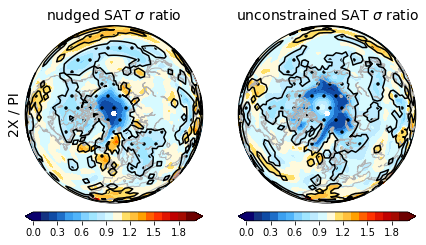

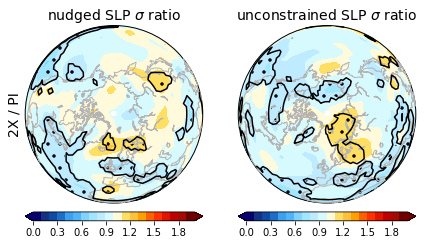

In [103]:
sigtype='cont'
sigtype='conthatch'

field='sat'
fig = plot_sigma_meanstate(allseastddt,nseafstatdt,useafstatdt,pparamssigrat)


field='slp'
fig = plot_sigma_meanstate(allseastddt,nseafstatdt,useafstatdt,pparamssigrat)


### Load monthly data and compute monthly stats

In [83]:
# load the full ts files and for each month, compute pvals


allmonflddt={}
allmonmeandt={}
allmonstddt={}

# load nudging runs
for cs in casenames[:4]:
    fldmondt={};fldmonmeandt={}; fldmonstddt={}
    
    #for field in ('st','pmsl','gz50000','sicn'):
    for fieldname in fieldnames.keys():
        field = fieldnames[fieldname]
        
        conv = convs[field]
        filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_ts.nc'
        print filename
        fldmondt[fieldname] = cnc.getNCvar(filename,ncvars[field])*conv
    
        monmean,monstd=cutl.climatologize(fldmondt[fieldname])
        fldmonmeandt[fieldname] = monmean
        fldmonstddt[fieldname] = monstd
    
    fldmondt['turb'] = fldmondt['lhflx']+fldmondt['shflx']
    fldmonmeandt['turb'] = fldmonmeandt['lhflx']+fldmonmeandt['shflx']
    fldmonstddt['turb'] = fldmonstddt['lhflx']+fldmonstddt['shflx']
    
    allmonmeandt[cs] = fldmonmeandt
    allmonstddt[cs] = fldmonstddt
    allmonflddt[cs] = fldmondt


# load unconstrained runs
for cs in ('piControl','gregory_2xco2'):
    fldmondt={}; fldmonstddt={}; fldmonmeandt={}
    
    #for field in ('tas','psl','zg50000.00','sic'):
    for fieldname in fieldnamesun.keys():   
        field = fieldnamesun[fieldname]
                
        if cs in ('gregory_2xco2',) and fieldname in ('z500','sic'): 
            pass
        else:
            conv = convs[field]
            filename = DataRoot + cs+'/'+cs+'_'+field+'_'+years[cs]+'_ts.nc'
            print filename
            fldmondt[fieldname] = cnc.getNCvar(filename,ncvars[field])*conv
    
            monmean,monstd=cutl.climatologize(fldmondt[fieldname])
            fldmonmeandt[fieldname] = monmean # seacycle
            fldmonstddt[fieldname] = monstd
            
    fldmondt['turb'] = fldmondt['lhflx']+fldmondt['shflx']
    fldmonmeandt['turb'] = fldmonmeandt['lhflx']+fldmonmeandt['shflx']
    fldmonstddt['turb'] = fldmonstddt['lhflx']+fldmonstddt['shflx']
    
    allmonmeandt[cs] = fldmonmeandt
    allmonstddt[cs] = fldmonstddt
    allmonflddt[cs] = fldmondt


/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_hfl_2922-3121_ts.nc
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_hfs_2922-3121_ts.nc
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_pmsl_2922-3121_ts.nc
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_sicn_2922-3121_ts.nc
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_gz50000_2922-3121_ts.nc
/Users/kelly/DATA/DataDisk/preipreiice/preipreiice_st_2922-3121_ts.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_hfl_3022-3221_ts.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_hfs_3022-3221_ts.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_pmsl_3022-3221_ts.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_sicn_3022-3221_ts.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_gz50000_3022-3221_ts.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb/prei2xco2iceb_st_3022-3221_ts.nc
/Users/kelly/DATA/DataDisk/2xco22xco2ice/2xco22xco2ice_hfl_2452-2651_ts.nc
/Users/kelly/DATA/DataDisk/2xco22xco2ic

In [84]:

allmonflddt['piControl']['z500'].shape



(11952, 64, 128)

In [85]:
# compute t and f statistics / pvals

pmonfstatdt={}; dmonfstatdt={}

for field in fieldnames.keys():
    
    print field, fieldnamesun[field],fieldnames[field]
    pmonfstatdt[field] = cutl.calc_monthlyfstat(allmonflddt['piControl'][field],
                                    allmonflddt['preipreiice'][field])
    if field not in ('z500','sic'):
        dmonfstatdt[field] = cutl.calc_monthlyfstat(allmonflddt['gregory_2xco2'][field],
                                        allmonflddt['2xco22xco2ice'][field])

        

lhflx hfls hfl
shflx hfss hfs
slp psl pmsl
sic sic sicn
z500 zg50000.00 gz50000
sat tas st


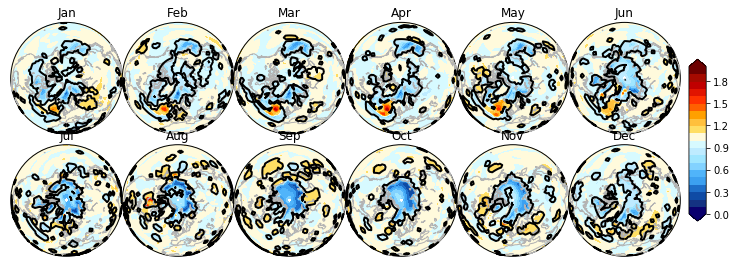

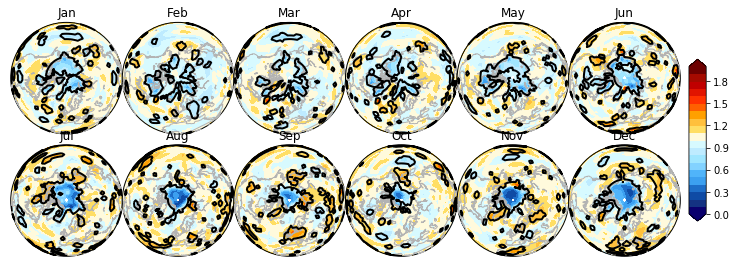

In [104]:
printtofile=True


field='sat'
pltfld = allmonstddt['preipreiice'][field][...,:-1] / allmonstddt['piControl'][field]

fig = cplt.map_allmonths(pltfld,lat,lon[:-1],ptype='nh',cmin=0,cmax=2,
                   cmap='blue2red_20',pvals=pmonfstatdt[field][1],sigtype='cont')
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_PI_monthly.pdf',bbox_inches='tight')    


pltfld = allmonstddt['2xco22xco2ice'][field][...,:-1] / allmonstddt['gregory_2xco2'][field]
fig = cplt.map_allmonths(pltfld,lat,lon[:-1],ptype='nh',cmin=0,cmax=2,
                   cmap='blue2red_20',pvals=dmonfstatdt[field][1],sigtype='cont')
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_2X_monthly.pdf',bbox_inches='tight')    


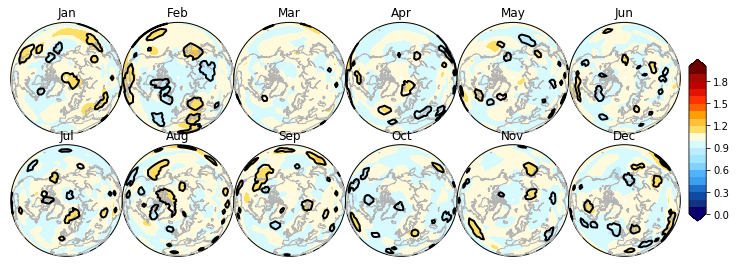

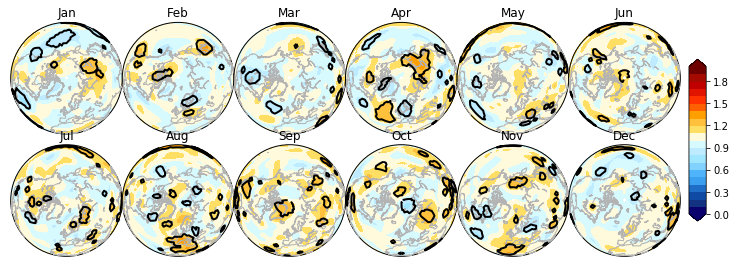

In [105]:

field='slp'
pltfld = allmonstddt['preipreiice'][field][...,:-1] / allmonstddt['piControl'][field]

fig = cplt.map_allmonths(pltfld,lat,lon[:-1],ptype='nh',cmin=0,cmax=2,
                   cmap='blue2red_20',pvals=pmonfstatdt[field][1],sigtype='cont')
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_PI_monthly.pdf',bbox_inches='tight')    

pltfld = allmonstddt['2xco22xco2ice'][field][...,:-1] / allmonstddt['gregory_2xco2'][field]
fig = cplt.map_allmonths(pltfld,lat,lon[:-1],ptype='nh',cmin=0,cmax=2,
                   cmap='blue2red_20',pvals=dmonfstatdt[field][1],sigtype='cont')
if printtofile:
    fig.savefig(field.upper()+'sigma_nudged_unconstr_2X_monthly.pdf',bbox_inches='tight')    


/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in divide
/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


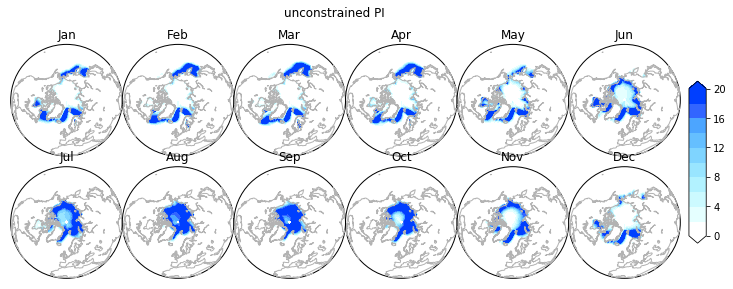

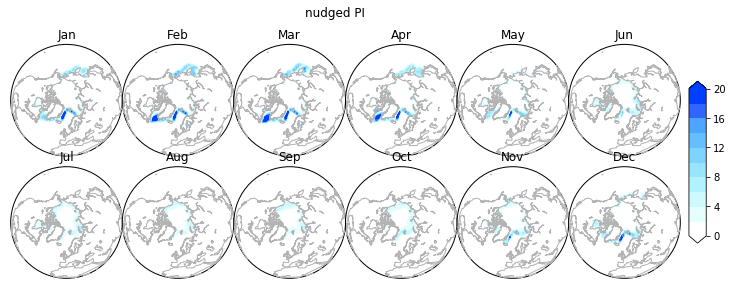

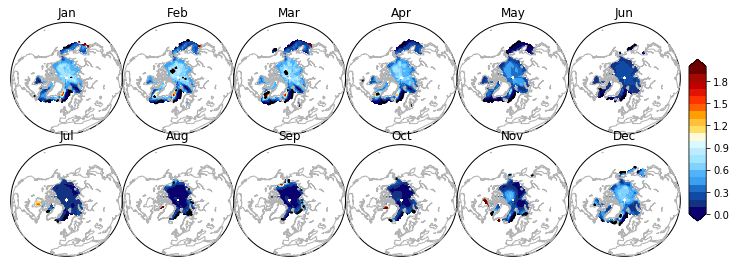

In [88]:
field='sic'

pltfld = allmonstddt['piControl'][field]

fig = cplt.map_allmonths(pltfld,lat,lon[:-1],title='unconstrained PI',
                         ptype='nh',cmin=0,cmax=20,cmap='blue2blue_w10')

pltfld = allmonstddt['preipreiice'][field]

fig = cplt.map_allmonths(pltfld,lat,lon,title='nudged PI',
                         ptype='nh',cmin=0,cmax=20,cmap='blue2blue_w10')


# ===========
pltfld = allmonstddt['preipreiice'][field][...,:-1] / allmonstddt['piControl'][field]

fig = cplt.map_allmonths(pltfld,lat,lon[:-1],ptype='nh',cmin=0,cmax=2,
                   cmap='blue2red_20',pvals=pmonfstatdt[field][1],sigtype='cont')

